In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns # visualization
import matplotlib.pyplot as plt # visualization
from datetime import datetime, date # converting into date data

import warnings # Supress warnings 
warnings.filterwarnings('ignore')

### Disclaimer. 

This notebook is focusing on implementing the theory of the time series analysis into the real dataset, not the accuracy of the model.

In [2]:
data = pd.read_csv("/Users/hyunminhong/Documents/Programmings/Python_Jupyter/Projects/water-analytics/dataset/Aquifer_Petrignano.csv")

In [3]:
data.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


In [4]:
print("The summary of null data:\n{}\n\nThe length of the dataset:\n{}".format(data.isnull().sum(), len(data)))

The summary of null data:
Date                                       0
Rainfall_Bastia_Umbra                   1024
Depth_to_Groundwater_P24                  55
Depth_to_Groundwater_P25                  39
Temperature_Bastia_Umbra                1024
Temperature_Petrignano                  1024
Volume_C10_Petrignano                    198
Hydrometry_Fiume_Chiascio_Petrignano    1024
dtype: int64

The length of the dataset:
5223


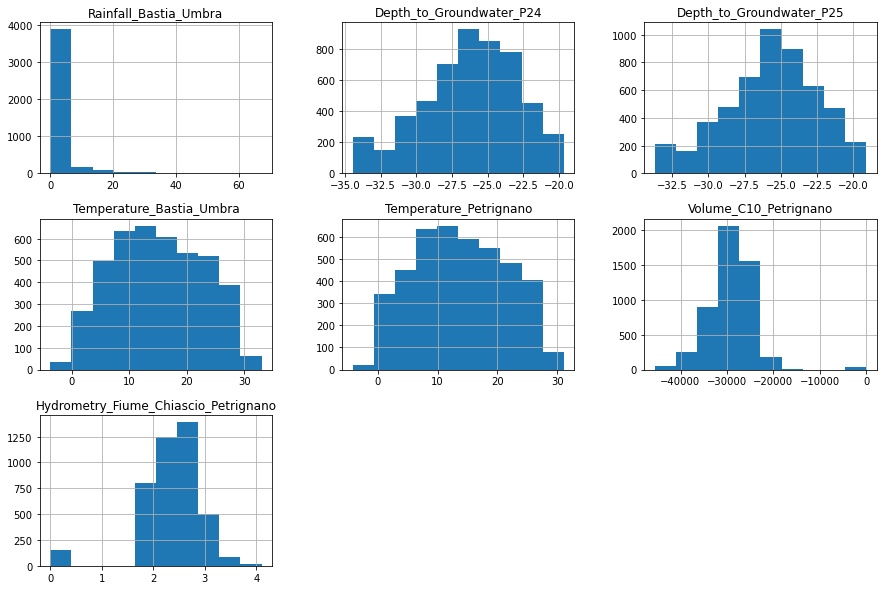

In [5]:
data.hist(figsize = (15,10))
plt.show()

Since the distributions of **Depth to Groundwater P24** and **Depth to Groundwater P25** have similar distributions, we drop one of the **depth** attributes with more null values. We do the same for the **temperature** attributes for simplicity. 

In [6]:
# drop the attributes for simplicity
data = data.drop(['Depth_to_Groundwater_P24', 'Temperature_Petrignano'], axis = 1)

# drop the null values for rainfall due to too many null values
data = data[data['Rainfall_Bastia_Umbra'].notnull()].reset_index(drop = True)

# change the column names for simplicity
data.columns = ['Date', 'Rainfall', 'Depth_to_Groundwater', 'Temperature', 'Volume', 'Hydrometry']

data.head()

,Date,Rainfall,Depth_to_Groundwater,Temperature,Volume,Hydrometry
0,01/01/2009,0.0,-31.14,5.2,-24530.688,2.4
1,02/01/2009,0.0,-31.11,2.3,-28785.888,2.5
2,03/01/2009,0.0,-31.07,4.4,-25766.208,2.4
3,04/01/2009,0.0,-31.05,0.8,-27919.296,2.4
4,05/01/2009,0.0,-31.01,-1.9,-29854.656,2.3


In [7]:
print("The summary of null data:\n{}".format(data.isnull().sum()))

The summary of null data:
Date                     0
Rainfall                 0
Depth_to_Groundwater    27
Temperature              0
Volume                   1
Hydrometry               0
dtype: int64


Since we are working with time series data, the most important features are the time related features, which is plausible. Ideally, the data is already in **chronological order** and the **time stamps are equidistant** in time series. Luckily, the data is already prepared for us. 

In [8]:
data['Date'] = pd.to_datetime(data.Date, format = '%d/%m/%Y') # change to datetime64[ns] data type

data.head()

,Date,Rainfall,Depth_to_Groundwater,Temperature,Volume,Hydrometry
0,2009-01-01,0.0,-31.14,5.2,-24530.688,2.4
1,2009-01-02,0.0,-31.11,2.3,-28785.888,2.5
2,2009-01-03,0.0,-31.07,4.4,-25766.208,2.4
3,2009-01-04,0.0,-31.05,0.8,-27919.296,2.4
4,2009-01-05,0.0,-31.01,-1.9,-29854.656,2.3


Features: 
* Rainfall
* Temperature
* Volume
* Hydrometry

Target:
* Depth to Groundwater

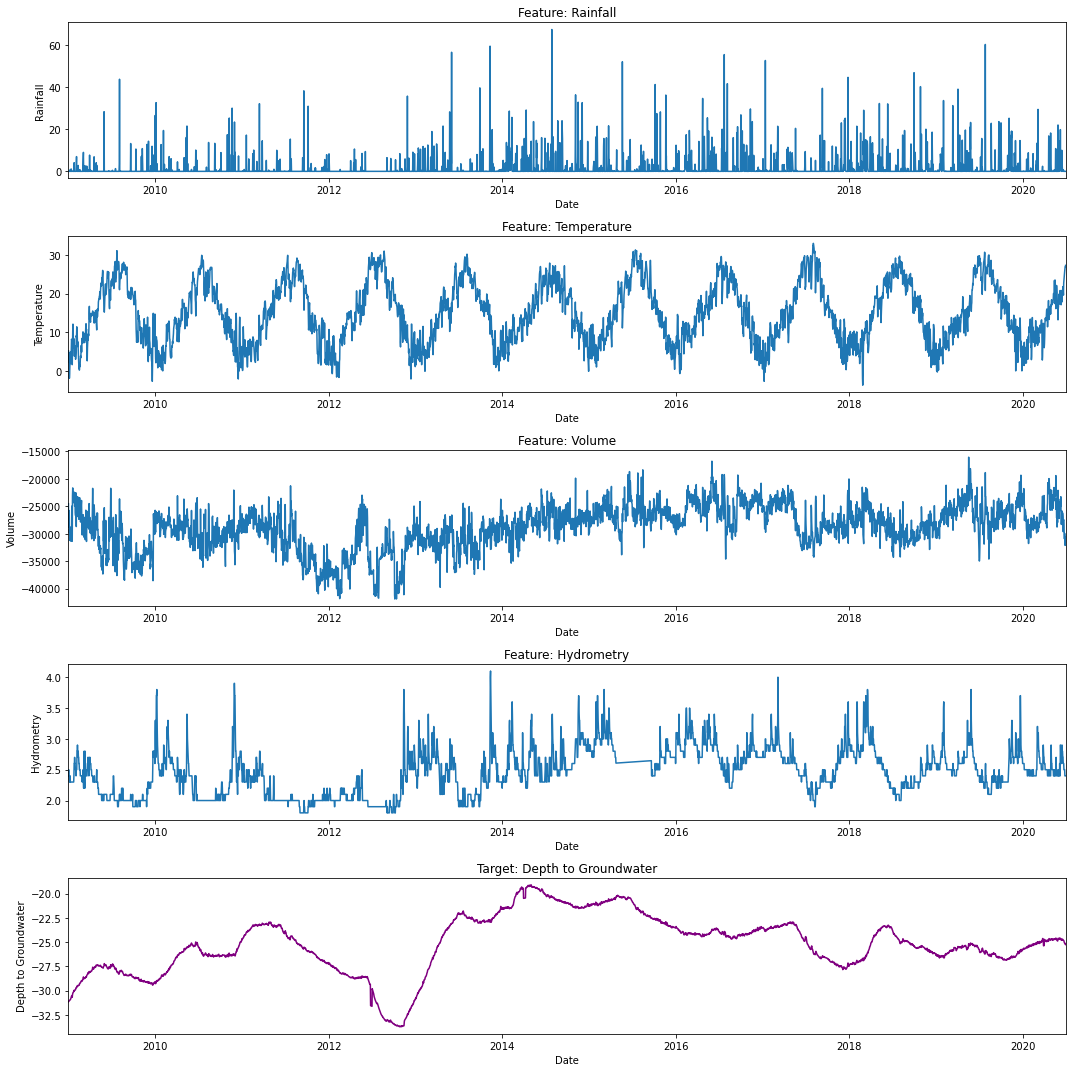

In [41]:
fig, ax = plt.subplots(nrows = 5, ncols = 1, figsize = (15, 15))

sns.lineplot(x = data.Date, y = data.Rainfall, 
             ax = ax[0])
ax[0].set_title('Feature: Rainfall')
ax[0].set_ylabel(ylabel = 'Rainfall')

sns.lineplot(x = data.Date, y = data.Temperature, 
             ax = ax[1])
ax[1].set_title('Feature: Temperature')
ax[1].set_ylabel(ylabel = 'Temperature')

sns.lineplot(x = data.Date, y = data.Volume.fillna(np.inf), 
             ax = ax[2])
ax[2].set_title('Feature: Volume')
ax[2].set_ylabel(ylabel = 'Volume')

sns.lineplot(x = data.Date, y = data.Hydrometry, 
             ax = ax[3])
ax[3].set_title('Feature: Hydrometry')
ax[3].set_ylabel(ylabel = 'Hydrometry')


sns.lineplot(x = data.Date, y = data.Depth_to_Groundwater.fillna(np.inf), 
             ax = ax[4], color = 'purple')
ax[4].set_title('Target: Depth to Groundwater')
ax[4].set_ylabel(ylabel = 'Depth to Groundwater')

for i in range(5):
    ax[i].set_xlim(min(data.Date), max(data.Date))

plt.tight_layout()
plt.show()

In [10]:
data.isnull().sum()

Date                     0
Rainfall                 0
Depth_to_Groundwater    27
Temperature              0
Volume                   1
Hydrometry               0
dtype: int64

In [11]:
data['Interval'] = data.Date - data.Date.shift(1)

# the data is already in chronological order and the time stamps are equidistant in time series
data['Interval'].value_counts() 

# after checking the time series data, we drop the column
data = data.drop('Interval', axis = 1)

From the above line plots, we can observe that **Volume** and **Hydrometry** have implausible zero values, and **Volume** and **Depth to Groundwater** have null values. Hence, we want to fill in some plausible values for these null and zero values. 

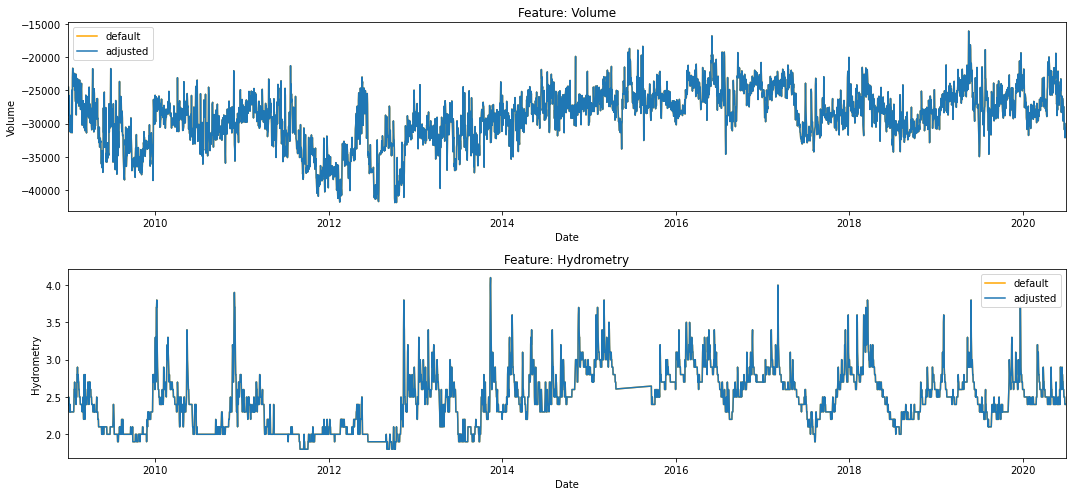

In [40]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (15, 7))

temp = data.Volume.copy()
data['Volume'] = np.where(data.Volume == 0, np.nan, data.Volume) # np.where(condition, x, y) = if condition, then x. Otherwise y

sns.lineplot(x = data.Date, y = temp, 
             ax = ax[0], color = 'orange', label = 'default')
sns.lineplot(x = data.Date, y = data.Volume.fillna(np.inf), 
             ax = ax[0], label = 'adjusted')
ax[0].set_title('Feature: Volume')
ax[0].set_ylabel(ylabel = 'Volume')
ax[0].legend()


temp = data.Hydrometry.copy()
data['Hydrometry'] = np.where(data.Hydrometry == 0, np.nan, data.Hydrometry)

sns.lineplot(x = data.Date, y = temp, 
             ax = ax[1], color = 'orange', label = 'default')
sns.lineplot(x = data.Date, y = data.Hydrometry.fillna(np.inf), 
             ax = ax[1], label = 'adjusted')
ax[1].set_title('Feature: Hydrometry')
ax[1].set_ylabel(ylabel = 'Hydrometry')
ax[1].legend()

for i in range(2):
    ax[i].set_xlim(min(data.Date), max(data.Date))
    
plt.tight_layout()
plt.show()

Now we can handle these missing values and there are multiple options for replacing NaN values.

**Non-time-series specific method:**
* Mean imputation
* Median imputation
* Mode imputation

*appropriate for stationary time series, for example, white noise data*

* Random sample imputation

*it is not likely to work well unless the random select is carefully chosen*

**Time-Series specific method:**
* Last observation carried forward (LOCF)
* Next observation carried backward (NOCB)
* Linear interpolation
* Spline interpolation 

*these methods rely on the assumption that adjacent observations are similar to one another. These methods do not work well when this assumption is not valid, especially when the presence of strong seasonality*

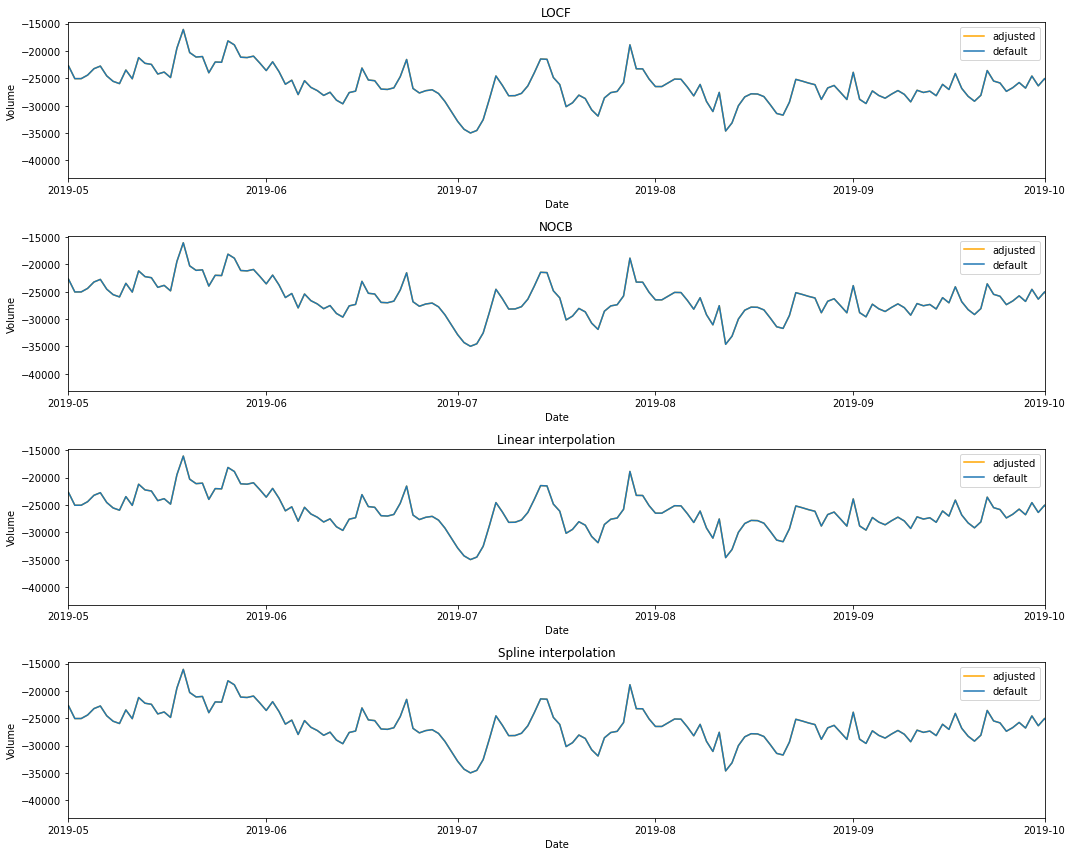

In [35]:
fig, ax = plt.subplots(nrows = 4, ncols = 1, figsize = (15, 12))


# LOCF
sns.lineplot(x = data.Date, y = data.Volume.ffill(),
            ax = ax[0], color = 'orange', label = 'adjusted')
sns.lineplot(x = data.Date, y = data.Volume.fillna(np.inf),
            ax = ax[0], label = 'default')
ax[0].set_title('LOCF')
ax[0].set_ylabel(ylabel = 'Volume')
ax[0].legend()


# NOCB
sns.lineplot(x = data.Date, y = data.Volume.bfill(), 
             ax = ax[1], color = 'orange', label = 'adjusted')
sns.lineplot(x = data.Date, y = data.Volume.fillna(np.inf), 
             ax = ax[1], label = 'default')
ax[1].set_title('NOCB')
ax[1].set_ylabel(ylabel = 'Volume')
ax[1].legend()


# Linear interpolation
sns.lineplot(x = data.Date, y = data.Volume.interpolate(), 
             ax = ax[2], color = 'orange', label = 'adjusted')
sns.lineplot(x = data.Date, y = data.Volume.fillna(np.inf), 
             ax = ax[2], label = 'default')
ax[2].set_title('Linear interpolation')
ax[2].set_ylabel(ylabel = 'Volume')
ax[2].legend()


# Spline interpolation
sns.lineplot(x = data.Date, y = data.Volume.interpolate(method = 'spline', order = 3), 
             ax = ax[3], color = 'orange', label = 'adjusted')
sns.lineplot(x = data.Date, y = data.Volume.fillna(np.inf), 
             ax = ax[3], label = 'default')
ax[3].set_title('Spline interpolation')
ax[3].set_ylabel(ylabel = 'Volume')
ax[3].legend()

for i in range(4):
    ax[i].set_xlim([date(2019, 5, 1), date(2019, 10, 1)])
    
plt.tight_layout()
plt.show()

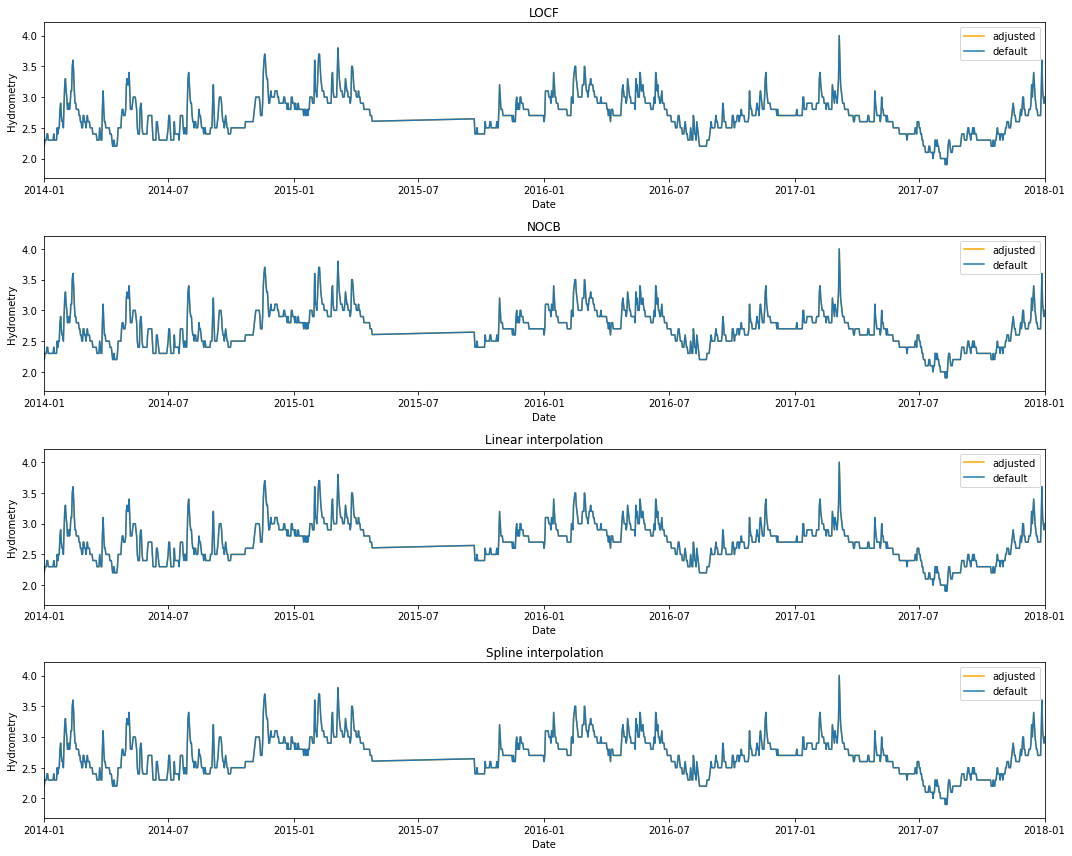

In [34]:
fig, ax = plt.subplots(nrows = 4, ncols = 1, figsize = (15, 12))


# LOCF
sns.lineplot(x = data.Date, y = data.Hydrometry.ffill(),
            ax = ax[0], color = 'orange', label = 'adjusted')
sns.lineplot(x = data.Date, y = data.Hydrometry.fillna(np.inf),
            ax = ax[0], label = 'default')
ax[0].set_title('LOCF')
ax[0].set_ylabel(ylabel = 'Hydrometry')
ax[0].legend()


# NOCB
sns.lineplot(x = data.Date, y = data.Hydrometry.bfill(), 
             ax = ax[1], color = 'orange', label = 'adjusted')
sns.lineplot(x = data.Date, y = data.Hydrometry.fillna(np.inf), 
             ax = ax[1], label = 'default')
ax[1].set_title('NOCB')
ax[1].set_ylabel(ylabel = 'Hydrometry')
ax[1].legend()


# Linear interpolation
sns.lineplot(x = data.Date, y = data.Hydrometry.interpolate(), 
             ax = ax[2], color = 'orange', label = 'adjusted')
sns.lineplot(x = data.Date, y = data.Hydrometry.fillna(np.inf), 
             ax = ax[2], label = 'default')
ax[2].set_title('Linear interpolation')
ax[2].set_ylabel(ylabel = 'Hydrometry')
ax[2].legend()


# Spline interpolation
sns.lineplot(x = data.Date, y = data.Hydrometry.interpolate(method = 'spline', order = 3), 
             ax = ax[3], color = 'orange', label = 'adjusted')
sns.lineplot(x = data.Date, y = data.Hydrometry.fillna(np.inf), 
             ax = ax[3], label = 'default')
ax[3].set_title('Spline interpolation')
ax[3].set_ylabel(ylabel = 'Hydrometry')
ax[3].legend()

for i in range(4):
    ax[i].set_xlim([date(2014, 1, 1), date(2018, 1, 1)])
    
plt.tight_layout()
plt.show()

As the ground truth is not given, I will choose the **(spline) interpolation** based on the plots. 

In [32]:
data1['Depth_to_Groundwater'] = data.Depth_to_Groundwater.interpolate(method = 'spline', order = 3)
data1['Volume'] = data.Volume.interpolate(method = 'spline', order = 3)
data1['Hydrometry'] = data.Hydrometry.interpolate(method = 'spline', order = 3)

data2['Depth_to_Groundwater'] = data.Depth_to_Groundwater.interpolate()
data2['Volume'] = data.Volume.interpolate()
data2['Hydrometry'] = data.Hydrometry.interpolate()